<a href="https://colab.research.google.com/github/udani705/udani705/blob/main/Deep_Learning_Mini_Project_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [50]:
import pandas as pd
!pip install pandas

#Mount G-Drive

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Give the Path to relevent CSV file

In [52]:
path = '/content/drive/MyDrive/CSV/TeleCom_2009_2023_Weekly.csv'
df = pd.read_csv(path)

In [53]:
df = pd.read_csv(path)

#Get the 1st 5 raws printed

In [54]:
print(df.head())

        Date  Price   Open  High    Low     Vol. Change %
0  5/17/2009  43.75  40.00  45.0  39.75  595.70K   10.06%
1  5/24/2009  42.00  44.00  44.5  41.50  386.50K   -4.00%
2  5/31/2009  41.75  41.75  43.5  41.00  178.20K   -0.60%
3   6/7/2009  43.00  42.00  43.5  41.25  854.30K    2.99%
4  6/14/2009  49.50  42.50  50.0  41.75    1.58M   15.12%


#Get all the data displayed

In [55]:
df


,Date,Price,Open,High,Low,Vol.,Change %
0,5/17/2009,43.75,40.00,45.00,39.75,595.70K,10.06%
1,5/24/2009,42.00,44.00,44.50,41.50,386.50K,-4.00%
2,5/31/2009,41.75,41.75,43.50,41.00,178.20K,-0.60%
3,6/7/2009,43.00,42.00,43.50,41.25,854.30K,2.99%
4,6/14/2009,49.50,42.50,50.00,41.75,1.58M,15.12%
...,...,...,...,...,...,...,...
712,3/12/2023,79.50,83.10,83.80,79.00,780.00K,-4.33%
713,3/19/2023,111.00,79.80,121.75,79.80,10.08M,39.62%
714,3/26/2023,94.70,112.50,117.00,91.50,2.24M,-14.68%
715,4/2/2023,102.00,91.50,102.00,89.60,1.33M,7.71%


#Check if the code contains any null values

In [69]:
df.isnull().sum()


Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

#Partition the obtained data into training and testing sets

In [70]:
from sklearn.model_selection import train_test_split

# Assuming 'Price' column contains the target variable

In [71]:
X = df[['Open', 'High', 'Low', 'Vol.', 'Change %']]
y = df['Price']

# Assuming 'Price' column contains the target variable

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Construct the LSTM - RNN model using the training dataset

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Convert 'Vol.' column to numeric after removing non-numeric characters

In [74]:
X_train['Vol.'] = X_train['Vol.'].str.replace(r'\D', '').astype(float)
X_test['Vol.'] = X_test['Vol.'].str.replace(r'\D', '').astype(float)

<ipython-input-74-3c98a710324e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train['Vol.'] = X_train['Vol.'].str.replace(r'\D', '').astype(float)
<ipython-input-74-3c98a710324e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test['Vol.'] = X_test['Vol.'].str.replace(r'\D', '').astype(float)


# Convert 'Change %' column to numeric after removing '%' character

In [75]:
X_train['Change %'] = X_train['Change %'].str.replace('%', '').astype(float)
X_test['Change %'] = X_test['Change %'].str.replace('%', '').astype(float)




# Perform scaling

In [76]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for LSTM

In [77]:
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


# Define the LSTM model

In [78]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# Fit the model

In [79]:
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
18/18 [==============================] - 2s 3ms/step - loss: 1744.8751
Epoch 2/50
18/18 [==============================] - 0s 3ms/step - loss: 1736.1300
Epoch 3/50
18/18 [==============================] - 0s 3ms/step - loss: 1725.5979
Epoch 4/50
18/18 [==============================] - 0s 3ms/step - loss: 1711.8523
Epoch 5/50
18/18 [==============================] - 0s 3ms/step - loss: 1693.3713
Epoch 6/50
18/18 [==============================] - 0s 2ms/step - loss: 1669.4930
Epoch 7/50
18/18 [==============================] - 0s 3ms/step - loss: 1638.9310
Epoch 8/50
18/18 [==============================] - 0s 3ms/step - loss: 1601.8407
Epoch 9/50
18/18 [==============================] - 0s 4ms/step - loss: 1558.2731
Epoch 10/50
18/18 [==============================] - 0s 3ms/step - loss: 1507.7812
Epoch 11/50
18/18 [==============================] - 0s 3ms/step - loss: 1452.9084
Epoch 12/50
18/18 [==============================] - 0s 3ms/step - loss: 1392.1506
Epoch 13/50
1

# Utilize the trained model to forecast stock price values for the test set data

In [80]:
predicted_prices = model.predict(X_test_reshaped)

5/5 [==============================] - 0s 3ms/step


# Assess the performance of the model by computing the Root Mean Squared Error (RMSE) value

In [81]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE

In [82]:
rmse = np.sqrt(mean_squared_error(y_test, predicted_prices))

# Print RMSE

In [83]:
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 10.222468098139197


#Plot actual prices & predicated prices, then set labels and title. Next after adding the legend show the plot

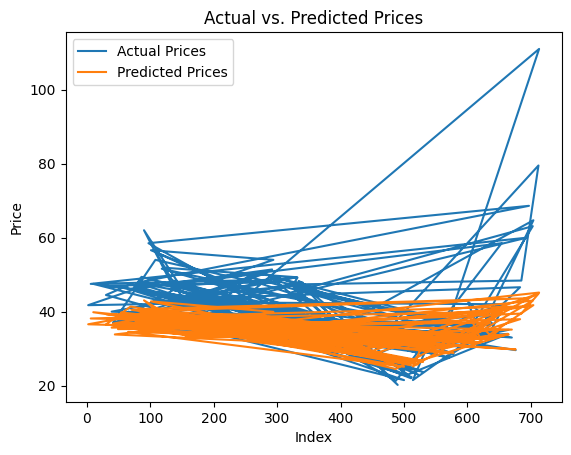

In [84]:
import matplotlib.pyplot as plt

plt.plot(y_test.index, y_test.values, label='Actual Prices')

plt.plot(y_test.index, predicted_prices, label='Predicted Prices')

plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')

plt.legend()

plt.show()


In [86]:
results = pd.DataFrame({'Actual Prices': y_test.values, 'Predicted Prices': predicted_prices.flatten()}, index=y_test.index)

print(results)


     Actual Prices  Predicted Prices
120           51.9         38.283508
331           49.3         37.514317
39            40.0         35.680141
636           36.3         37.060547
514           21.5         25.197542
..             ...               ...
132           47.7         37.173779
292           51.4         38.492477
41            37.0         36.775066
108           54.0         38.757244
264           48.0         38.207249

[144 rows x 2 columns]


# Train the model with validation data

In [93]:
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_reshaped, y_test))


Epoch 1/50
18/18 [==============================] - 0s 10ms/step - loss: 23.8111 - val_loss: 32.1048
Epoch 2/50
18/18 [==============================] - 0s 5ms/step - loss: 23.4817 - val_loss: 31.7520
Epoch 3/50
18/18 [==============================] - 0s 6ms/step - loss: 23.1672 - val_loss: 31.3935
Epoch 4/50
18/18 [==============================] - 0s 7ms/step - loss: 22.8419 - val_loss: 31.0591
Epoch 5/50
18/18 [==============================] - 0s 6ms/step - loss: 22.5299 - val_loss: 30.7293
Epoch 6/50
18/18 [==============================] - 0s 6ms/step - loss: 22.2384 - val_loss: 30.3720
Epoch 7/50
18/18 [==============================] - 0s 5ms/step - loss: 21.9283 - val_loss: 30.0305
Epoch 8/50
18/18 [==============================] - 0s 5ms/step - loss: 21.6258 - val_loss: 29.7102
Epoch 9/50
18/18 [==============================] - 0s 4ms/step - loss: 21.3486 - val_loss: 29.3707
Epoch 10/50
18/18 [==============================] - 0s 7ms/step - loss: 21.0374 - val_loss: 29.068

# Plot the model loss curve

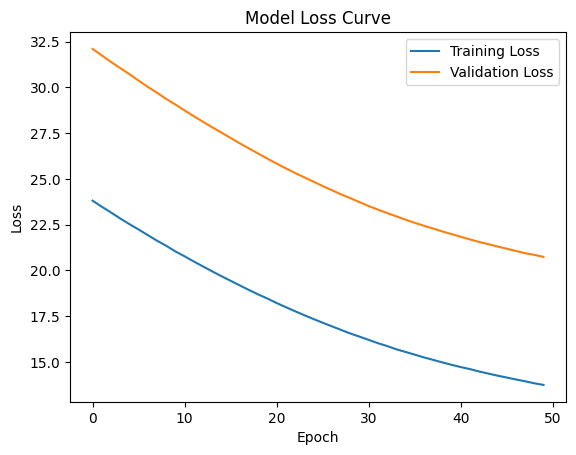

In [94]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss Curve')
plt.legend()
plt.show()
